In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
plt.rcParams['figure.figsize'] = [18, 9]

# CARGA DATASET B&W

(10, 1080, 1920)


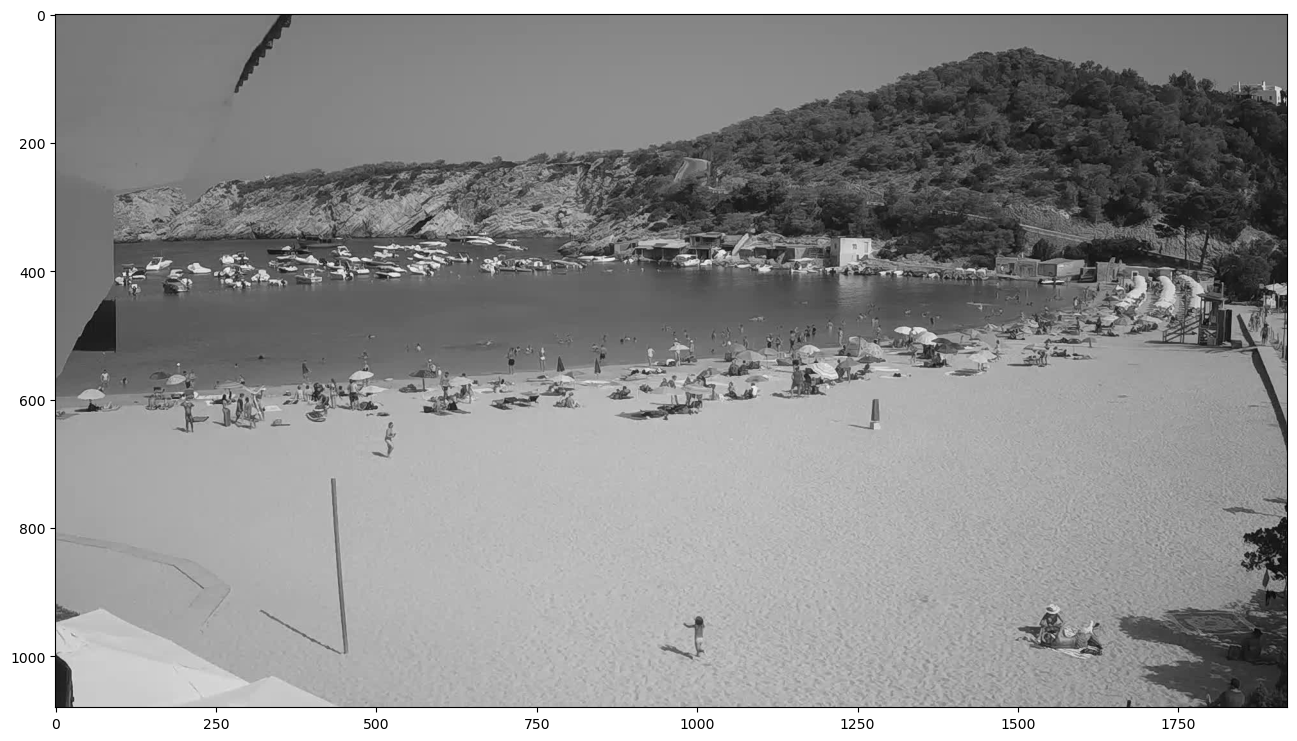

In [2]:
image_filenames = os.listdir("data")
for i in range(len(image_filenames)):
    image_filenames[i] = "data/" + image_filenames[i]

image_stack = np.stack([cv2.imread(filename, cv2.IMREAD_GRAYSCALE) for filename in image_filenames], axis=2)

image_stack = np.transpose(image_stack, (2, 0, 1))

print(image_stack.shape)
plt.imshow(image_stack[0], cmap = "gray")

## Modifiacion de histograma clahe
## Diferencia con playa vacia
## Recorte de montaña y barcos

(-0.5, 1919.5, 1079.5, -0.5)

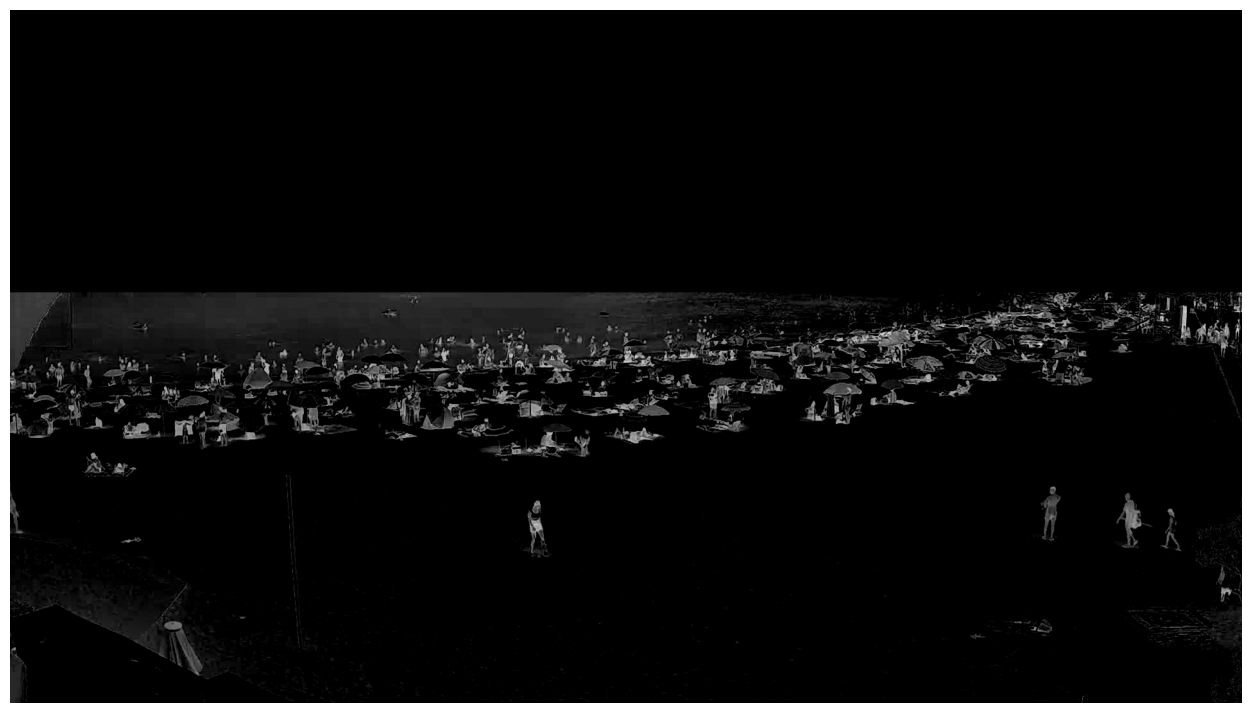

In [5]:
clahe = cv2.createCLAHE(clipLimit=1)

image_mod_3 = image_stack[3].copy()
image_mod_3[0:440,:] = 0

image_mod_9 = image_stack[9].copy()
image_mod_9[0:440,:] = 0

image_mod_4 = image_stack[4].copy()
image_mod_4[0:440,:] = 0

empty_beach_3 = clahe.apply(image_mod_3)

empty_beach_9 = clahe.apply(image_mod_9)

test_image_1 = clahe.apply(image_mod_4)

subs_image = cv2.subtract(empty_beach_9, test_image_1)

plt.imshow(subs_image, cmap = "gray")
plt.axis('off')

# TOPHAT

(-0.5, 1919.5, 1079.5, -0.5)

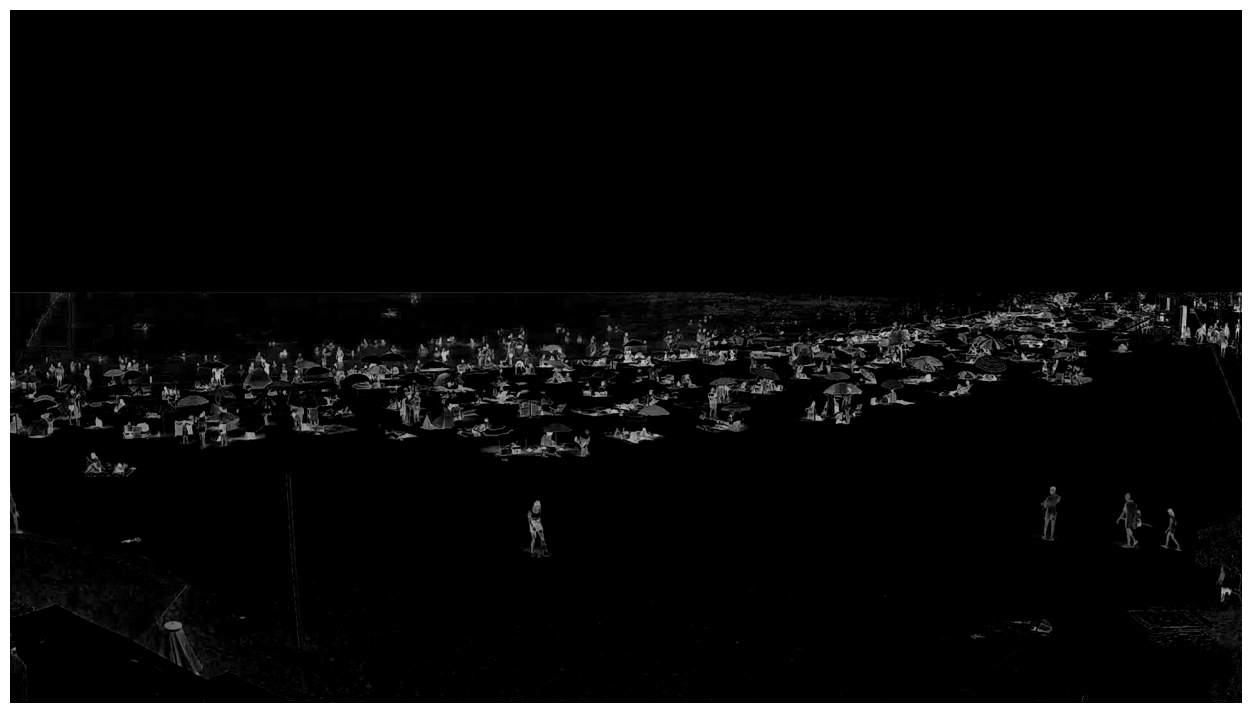

In [11]:
kernelSize = (10,18)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
tophat = cv2.morphologyEx(subs_image, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap="gray")
plt.axis('off')